In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

root_dir = Path("/home/hadim/.data/Neural_Network/Maskflow/Shapes")
log_dir = root_dir / "Logs"

# Explore Existing Models Training Summaries

In [3]:
logs_path = {}
for model_path in log_dir.iterdir():
    if model_path.is_dir():
        log_path = list(model_path.glob("*.out.tfevents.*"))[0]
        logs_path[model_path.name] = log_path

In [4]:
events = {}

for model_name, log_path in logs_path.items():
    for summary in tf.train.summary_iterator(str(log_path)):
        if summary.HasField("summary"):
            datum = {}
            datum["model_name"] = model_name
            datum["step"] = summary.step
            datum["wall_time"] = summary.wall_time
            datum[summary.summary.value[0].tag] = summary.summary.value[0].simple_value

            key_name = f"{model_name}_{summary.step}"
            if key_name not in events.keys():
                events[key_name] = {}

            events[key_name].update(datum)
        
events = pd.DataFrame.from_dict(events).T
events = events.sort_values(["model_name", "step"])
events.reset_index(inplace=True, drop=True)

DataLossError: truncated record at 5785123

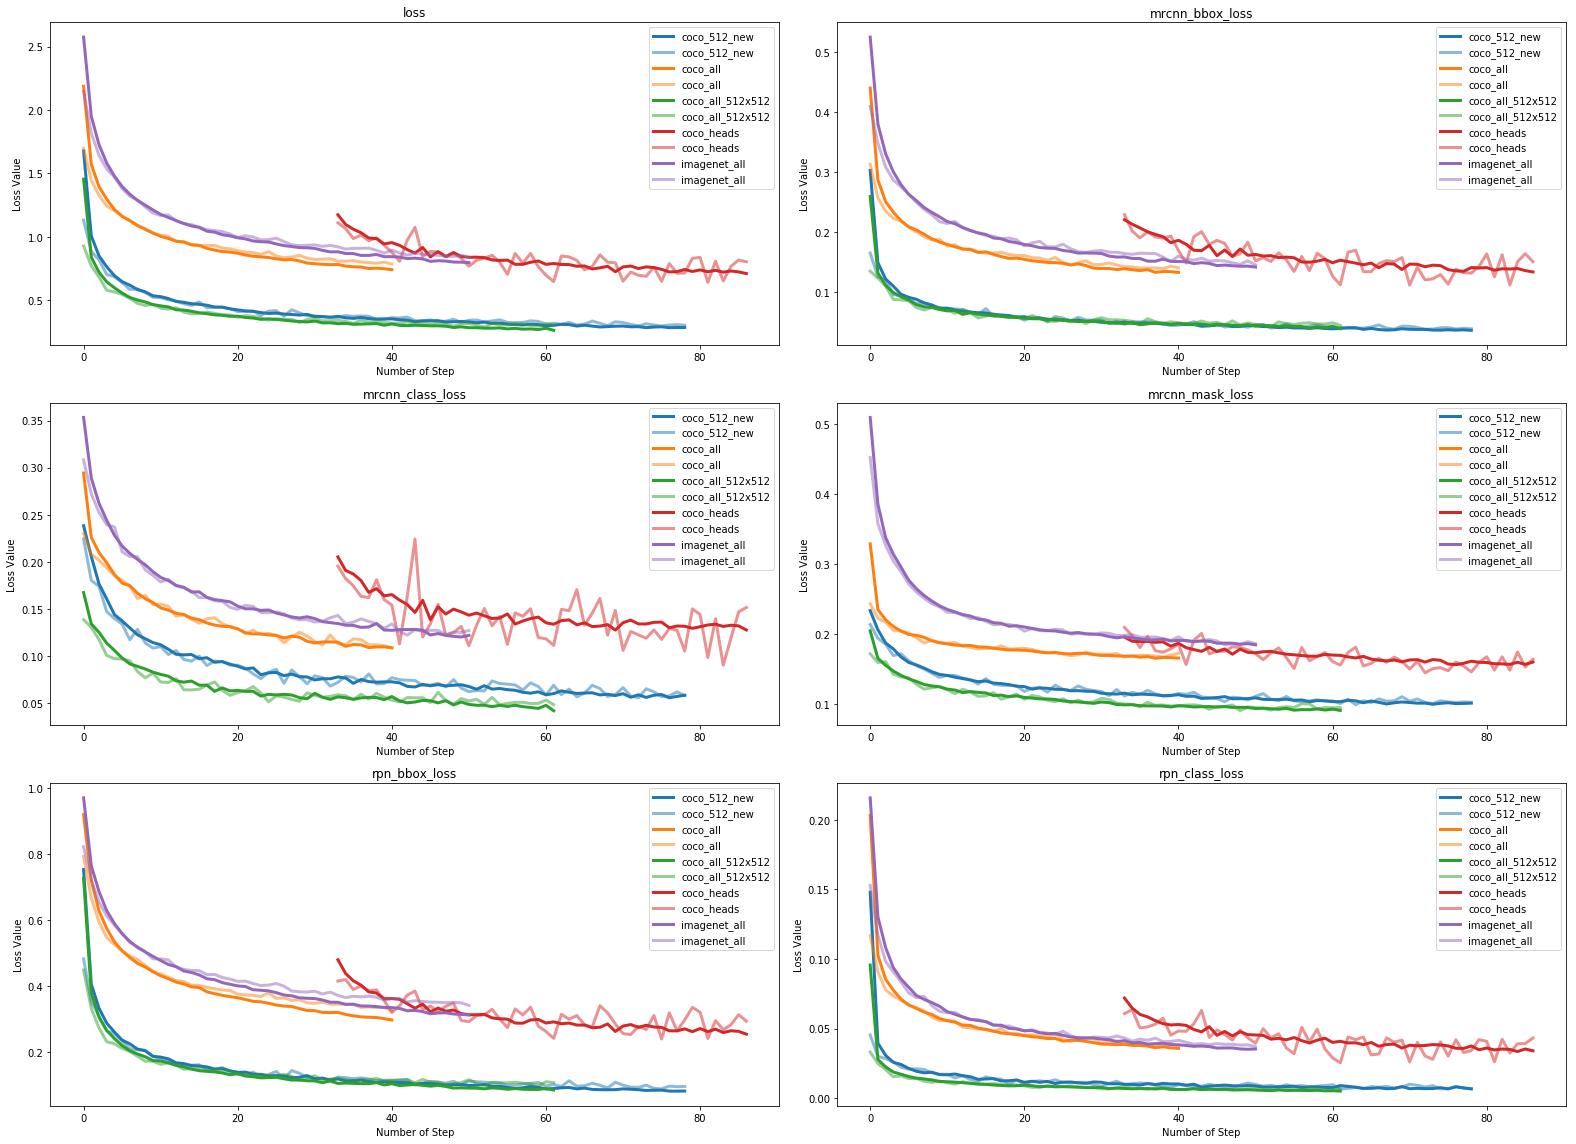

In [111]:
nrows = len(features) // 2
nrows += 1 if len(features) % 2 > 0 else 0
fig, axs = plt.subplots(ncols=2, nrows=nrows, figsize=(22, 16))

for ax, feature in zip(axs.flat, features):
    for i, row in events.groupby("model_name"):
        line = ax.plot(row.step, row[f"{feature}"], lw=3, label=i)[0]
        ax.plot(row.step, row[f"val_{feature}"], lw=3, color=line.get_color(), alpha=0.5, label=i)
        ax.set_title(feature)
        ax.set_xlabel("Number of Step")
        ax.set_ylabel("Loss Value")

    ax.legend()
    #ax.set_xscale("log")
    
fig.tight_layout()
fig.savefig(model_dir / "loss_values.png", dpi=200)